# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [51]:
!pip install intertools

ERROR: Could not find a version that satisfies the requirement intertools (from versions: none)
ERROR: No matching distribution found for intertools


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.spatial import distance
#import intertools as it
plt.rcParams['figure.figsize'] = [8, 8]

In [53]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [54]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()

# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [55]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntox en 2D con funcion normal, al rededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2

In [56]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relacion lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b

In [57]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    #coeficientes : array de 3 elementos [a, b, c]
    #    Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y

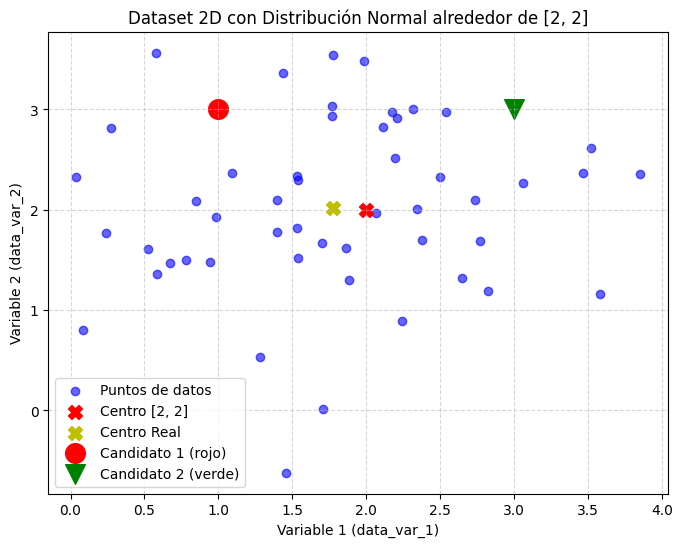

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


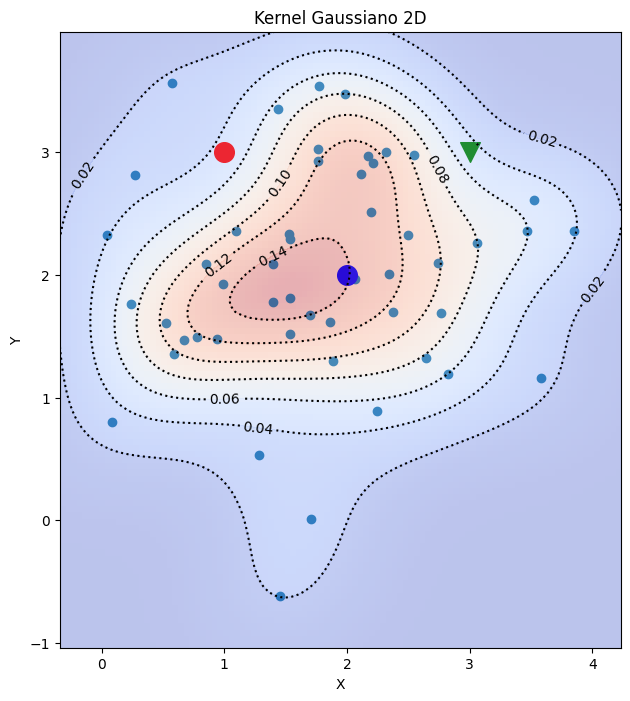

In [58]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

In [59]:
# TODO 1.1 crear y vizualizar el dataset con relacion lineal y con relacion cuadratica
dxr, dyr = cargar_datasetRelacionLineal(
    factor=np.array([1, 0.5]),
    n_data_points=50,
    ds_center=ds_center)

dx2, dy2 = cargar_datasetRelacionCuadratica(
    coeficientes=np.array([0.5, 0, 0]),
    n_data_points=50)

--- Visualizando Dataset Relación Lineal ---


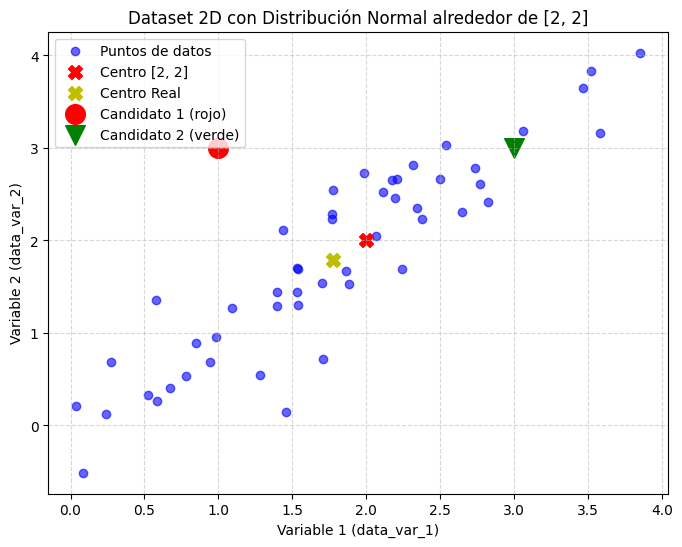

--- Visualizando Dataset Relación Cuadrática ---


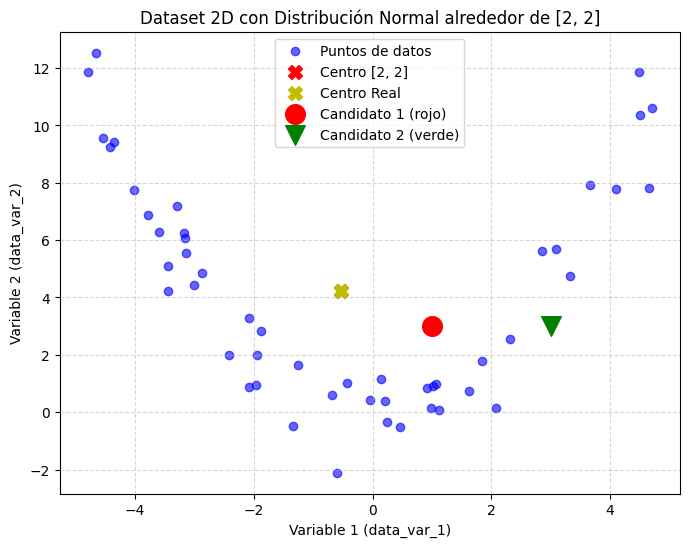

In [63]:
print("--- Visualizando Dataset Relación Lineal ---")
dxr, dyr = cargar_datasetRelacionLineal(factor=np.array([1, 0.5]), n_data_points=50, ds_center=ds_center)
visualize_scatter(dxr, dyr, ds_center, c1, c2)

print("--- Visualizando Dataset Relación Cuadrática ---")
dx2, dy2 = cargar_datasetRelacionCuadratica(coeficientes=np.array([0.5, 0, 0]), n_data_points=50)
# Para visualizar el cuadrático, definimos un centro aproximado en el medio de los datos generados para mantener compatibilidad
center_cuad = np.array([np.mean(dx2), np.mean(dy2)])
visualize_scatter(dx2, dy2, center_cuad, c1, c2)

In [64]:
# Dataset grande
dxGrande, dyGrande =cargar_datasetRelacionLineal([20,10], 1000, [50,100])

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**

In [65]:
# TODO 2.1 : Use la covarianza para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr}, {dx2, dy2} y {dxGrande, dyGrande}
# su codigo aqui np.cov
cov_normal = np.cov(np.vstack([dx, dy]))
print(f'Covarianza dataset con distribución normal:\n{cov_normal}')

cov_lineal = np.cov(np.vstack([dxr, dyr]))
print(f'Covarianza dataset con relación lineal:\n{cov_lineal}')

cov_grande = np.cov(np.vstack([dxGrande, dyGrande]))
print(f'Covarianza dataset con relación lineal Grande:\n{cov_grande}')

cov_cuad = np.cov(np.vstack([dx2, dy2]))
print(f'Covarianza dataset con relación cuadratica:\n{cov_cuad}')


Covarianza dataset con distribución normal:
[[0.87173739 0.08985489]
 [0.08985489 0.76444418]]
Covarianza dataset con relación lineal:
[[0.87173739 0.91666484]
 [0.91666484 1.15270333]]
Covarianza dataset con relación lineal Grande:
[[383.54554143 375.65364293]
 [375.65364293 467.25326789]]
Covarianza dataset con relación cuadratica:
[[ 8.34535038 -1.24204787]
 [-1.24204787 15.18168342]]


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

El dataset lineal grande (dxGrande, dyGrande) muestra los valores absolutos de covarianza más altos. Sin embargo, esto es engañoso porque la escala de los datos es mucho mayor. Entre los datasets de escala pequeña, el dataset de relación lineal (dxr, dyr) muestra una covarianza positiva clara indicando dependencia.

¿Cual es el problema que tiene la covarianza?

La covarianza no está normalizada. Su magnitud depende de la escala de las variables (si es en kilomtetros o metros). Esto hace muy difícil comparar la fuerza de la relación entre datasets con diferentes unidades o escalas.

In [66]:
# TODO 2.2: Use el coeficiente de correlación de Pearson para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr} y {dxGrande, dyGrande}
# su codigo aqui np.corrcoef
print('\n=== ANÁLISIS DE CORRELACIÓN DE PEARSON ===')

corr_normal = np.corrcoef(dx, dy)
print(f'Correlación dataset Normal:\n{corr_normal}')

corr_lineal = np.corrcoef(dxr, dyr)
print(f'Correlación dataset Lineal:\n{corr_lineal}')

corr_grande = np.corrcoef(dxGrande, dyGrande)
print(f'Correlación dataset Lineal Grande:\n{corr_grande}')


=== ANÁLISIS DE CORRELACIÓN DE PEARSON ===
Correlación dataset Normal:
[[1.         0.11007179]
 [0.11007179 1.        ]]
Correlación dataset Lineal:
[[1.         0.91444789]
 [0.91444789 1.        ]]
Correlación dataset Lineal Grande:
[[1.         0.88736636]
 [0.88736636 1.        ]]


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

Tanto el dataset lineal pequeño como el grande tienen una correlación cercana a 1, lo que confirma su fuerte dependencia lineal. La correlación del dataset grande es probablemente la más alta debido a cómo se generaron los datos.

¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?

El coeficiente de correlación de Pearson. Al estar normalizado entre -1 y 1, permite saber instantáneamente si la relación es fuerte (cerca de los extremos) o débil (cerca de 0), independientemente de la escala de los datos.

# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [67]:
#  TODO 3.1 completar el codigo de las funciones de las siguientes medidas de disimilitud:
#  Distancia Euclidiana, Distancia Manhattan, Distancia Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
#  En scipy.spatial.distance tenemos disponibles las distancias minkowski, mahalanobis, jaccard, hamming, euclidean, cosine, entre otras.
#  En numpy tenemos la norma p =  np.linalg.norm

In [68]:
def distancia_euclidiana(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord= 2)
   print(f'Distancia euclidiana del punto {p1} al punto {p2} = {dist}')
   return dist

In [69]:
def distancia_manhattan(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord=1) # ← COMPLETAR
   print(f'Distancia manhattan del punto {p1} al punto {p2} = {dist}')
   return dist

In [70]:
# ← COMPLETAR Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard

In [71]:
def distancia_chebyshev(p1, p2):
    dist = np.linalg.norm(p2 - p1, ord=np.inf)
    return dist

In [72]:
def similitud_coseno(p1, p2):
    # Coseno devuelve distancia (1 - similitud), por eso restamos de 1 para obtener similitud
    sim = 1 - distance.cosine(p1, p2)
    return sim

In [73]:
def distancia_mahalanobis(p1, p2, VI):
    # VI es la inversa de la matriz de covarianza
    dist = distance.mahalanobis(p1, p2, VI)
    return dist

In [74]:
def distancia_jaccard(p1, p2):
    # Nota: Jaccard suele usarse para booleanos. Scipy tratará != 0 como True.
    dist = distance.jaccard(p1, p2)
    return dist

In [75]:
print("🔍 Calculando las distancias de los puntos candidatos al centro del Dataset Normal")

# 1. Centro del primer dataset (Normal)
ds_center_calc = np.mean(np.vstack([dx, dy]), axis=1) # Centroide real de los datos
# Matriz de covarianza inversa para Mahalanobis
cov_matrix = np.cov(np.vstack([dx, dy]))
inv_cov_matrix = np.linalg.inv(cov_matrix)

print(f"Centroide calculado: {ds_center_calc}")
print(f"Candidato 1: {c1}, Candidato 2: {c2}")

# Distancias para Candidato 1
d_euc_c1 = distancia_euclidiana(c1, ds_center_calc)
d_man_c1 = distancia_manhattan(c1, ds_center_calc)
d_che_c1 = distancia_chebyshev(c1, ds_center_calc)
d_mah_c1 = distancia_mahalanobis(c1, ds_center_calc, inv_cov_matrix)

print(f"\n--- Distancias Candidato 1 ---")
print(f"Euclidiana: {d_euc_c1:.4f}")
print(f"Manhattan:  {d_man_c1:.4f}")
print(f"Chebyshev:  {d_che_c1:.4f}")
print(f"Mahalanobis:{d_mah_c1:.4f}")

# Distancias para Candidato 2
d_euc_c2 = distancia_euclidiana(c2, ds_center_calc)
d_man_c2 = distancia_manhattan(c2, ds_center_calc)
d_mah_c2 = distancia_mahalanobis(c2, ds_center_calc, inv_cov_matrix)

print(f"\n--- Distancias Candidato 2 ---")
print(f"Euclidiana: {d_euc_c2:.4f}")
print(f"Mahalanobis:{d_mah_c2:.4f}")

🔍 Calculando las distancias de los puntos candidatos al centro del Dataset Normal
Centroide calculado: [1.77452609 2.01778087]
Candidato 1: [1 3], Candidato 2: [3 3]
Distancia euclidiana del punto [1 3] al punto [1.77452609 2.01778087] = 1.2508577416548483
Distancia manhattan del punto [1 3] al punto [1.77452609 2.01778087] = 1.7567452242759072

--- Distancias Candidato 1 ---
Euclidiana: 1.2509
Manhattan:  1.7567
Chebyshev:  0.9822
Mahalanobis:1.4771
Distancia euclidiana del punto [3 3] al punto [1.77452609 2.01778087] = 1.5705224324671165
Distancia manhattan del punto [3 3] al punto [1.77452609 2.01778087] = 2.207693034788188

--- Distancias Candidato 2 ---
Euclidiana: 1.5705
Mahalanobis:1.6410


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué medidas de disimilitud son de un punto a otro punto?
¿Qué medidas de disimilitud son de un punto a una distribución?

Punto a Punto: Euclidiana, Manhattan, Chebyshev, Coseno, Jaccard. Estas miden la separación geométrica o estructural entre dos vectores sin importar el contexto de los demás datos.


Punto a Distribución: Mahalanobis. Esta medida requiere la matriz de covarianza del dataset, lo que significa que "aprende" la forma y dispersión de la nube de puntos para determinar qué tan "lejos" está un punto en términos estadísticos, no solo geométricos.

¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?

Sí. La distancia de Mahalanobis normaliza las diferencias basándose en la varianza y la correlación de las variables. Si los datos están muy dispersos en un eje, una gran distancia geométrica en ese eje podría contar poco estadísticamente, mientras que una pequeña distancia en un eje con poca varianza contaría mucho.

# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recive como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [76]:
def matriz_distancias(X, funcion_distancia, mC=None):
  #4.1 Completar el código
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))

    # Creamos un índice iterable de pares (0,0), (0,1)...
    for i, j in it.product(range(n_samples), range(n_samples)):
        p1 = X[i]
        p2 = X[j]

        if mC is not None:
            # Caso Mahalanobis
            mD[i, j] = funcion_distancia(p1, p2, mC)
        else:
            # Caso Euclidiana, Manhattan, etc.
            mD[i, j] = funcion_distancia(p1, p2)

    return mD


In [77]:
 # ← COMPLETAR calcule y grafique la matriz de distancias para todos los datasets y use la medida de disimilitud euclidiana y mahalanobis
# calculamos primero la matriz de covarianzas
X_data = np.vstack([dx, dy]).T

# 1. Euclidiana
Ma_euclidea = matriz_distancias(X_data, distancia_euclidiana)

# 2. Mahalanobis
cov_mat = np.cov(X_data.T)
inv_cov_mat = np.linalg.inv(cov_mat)
Ma_mahalanobis = matriz_distancias(X_data, distancia_mahalanobis, mC=inv_cov_mat)

print('\nEjemplo valores Matriz Mahalanobis (primeras 3 filas):\n', Ma_mahalanobis[:3, :3])

Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 0.9519004187135587
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.0123271291088105
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.0658486127228506
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.0168072296719541
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 0.9501739362700208
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 1.5890480537201892
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.6887335415445033
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 0.9662152128101167
Distancia euclidiana del punto [2.

Text(0.5, 1.0, 'Mahalanobis')

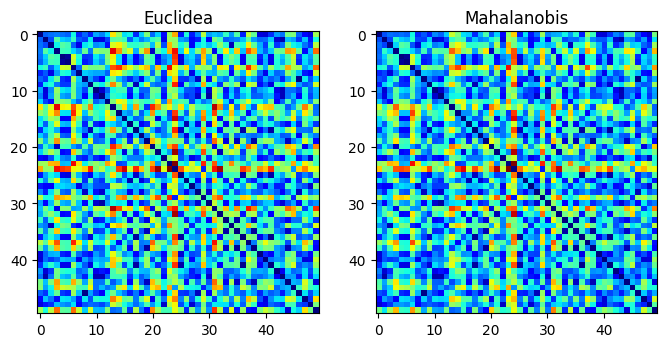

In [78]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Ma_euclidea, cmap='jet')
ax[0].set_title('Euclidea')
ax[1].imshow(Ma_mahalanobis, cmap='jet')
ax[1].set_title('Mahalanobis')

In [79]:
#Hasta ahora hemos visto todo disimilitudes (distancias). ¿Y si quisiéramos una medida de similitud?
def matriz_similitud(X, distancia, mC=None):
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)
    # complete
    mS = 1 / (1 + mD)
    return mS

Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 0.9519004187135587
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.0123271291088105
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.0658486127228506
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.0168072296719541
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 0.9501739362700208
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 1.5890480537201892
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.6887335415445033
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 0.9662152128101167
Distancia euclidiana del punto [2.

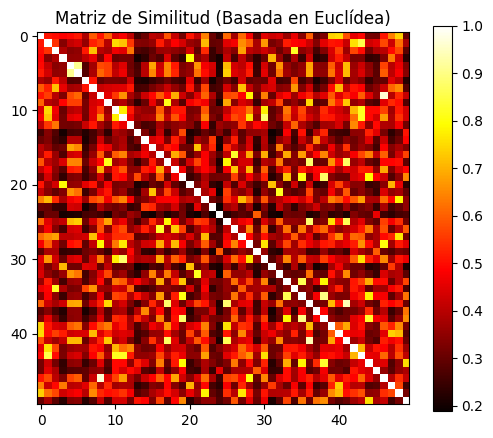

In [80]:
# Complete 4.3 Grafique la matriz de similitud
Sim_euclidea = matriz_similitud(X_data, distancia_euclidiana)

plt.figure(figsize=(6, 5))
plt.imshow(Sim_euclidea, cmap='hot')
plt.title('Matriz de Similitud (Basada en Euclídea)')
plt.colorbar()
plt.show()

# ✅ **RESULTADOS:**
¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?

Para mi, fue más facil el gráfico de similitud, porque permite detectar de mejor manera los clusters. En el mapa de calor, se buscan las zonas más brillantes, indicando que los puntos se parecen mucho entre sí.


# 🚀 ¡TALLER FINALIZADO!"